In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Questionaries' for pre-diagnose diabetes (Responses) - Form Responses 1(cleaned).csv")
data.head()

Age  Gender  Weight  ... Muscle stiffness Alopecia Diabetes 
0  38.060144  Female      61  ...               No       No        No
1  27.000000  Female      74  ...               No       No        No
2  55.000000    Male      65  ...               No       No       Yes
3  54.000000  Female      52  ...              Yes       No       Yes
4  69.000000    Male      62  ...               No       No       Yes

[5 rows x 19 columns]

In [ ]:
columns = data.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in columns:
  if data[i].dtypes == 'O':
    data[i] = le.fit_transform(data[i])

data.head()

Age  Gender  Weight  ...  Muscle stiffness  Alopecia  Diabetes 
0  38.060144       0      61  ...                 0         0          0
1  27.000000       0      74  ...                 0         0          0
2  55.000000       1      65  ...                 0         0          1
3  54.000000       0      52  ...                 1         0          1
4  69.000000       1      62  ...                 0         0          1

[5 rows x 19 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
data.iloc[:, [0,2]] = scale.fit_transform(data.iloc[:, [0,2]])

In [ ]:
data.head()

Age  Gender    Weight  ...  Muscle stiffness  Alopecia  Diabetes 
0  0.355192       0  0.622449  ...                 0         0          0
1  0.215190       0  0.755102  ...                 0         0          0
2  0.569620       1  0.663265  ...                 0         0          1
3  0.556962       0  0.530612  ...                 1         0          1
4  0.746835       1  0.632653  ...                 0         0          1

[5 rows x 19 columns]

In [ ]:
x = data.drop(['Diabetes '], axis = 1)
y = data['Diabetes ']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
pip install shap

In [ ]:
import shap
def show_shap(model):
  explainer = shap.Explainer(model.predict, x_train, feature_names= columns)
  svalues = explainer(x_test)
  shap.summary_plot(svalues)
  shap.plots.bar(svalues, max_display=20)

  #store SHAP values of every feature
  values = []
  for i in range(svalues.values.shape[1]):
    a=0
    for j in range(svalues.values.shape[0]):
      a += abs(svalues.values[j][i])
    mean = a/svalues.values.shape[0]
    values.append("{:.3f}".format(mean))
  return values

def shap_value_data(shap_values, data):
  data_frame = pd.DataFrame([values,], columns=columns[:18])
  return pd.concat([data, data_frame], ignore_index= True)


###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

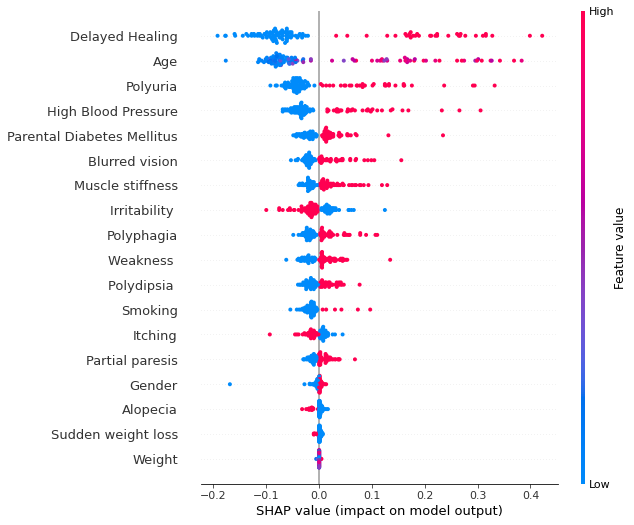

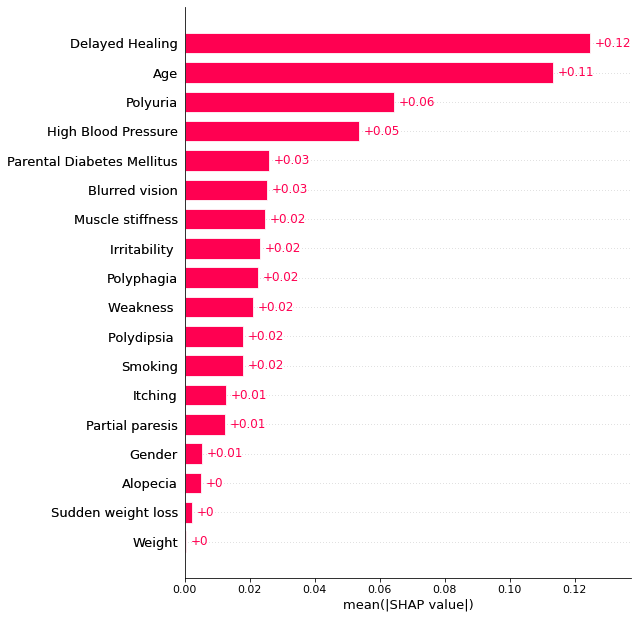

In [ ]:
values = show_shap(lr)

In [ ]:
shap_data = pd.DataFrame([values,], columns=columns[:18])

In [ ]:
shap_data

Age Gender Weight  ... Partial paresis Muscle stiffness Alopecia
0  0.113  0.005  0.000  ...           0.012            0.025    0.005

[1 rows x 18 columns]

###**KNN**

In [1]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

NameError: ignored

In [2]:
values = show_shap(knn)
shap_data = shap_value_data(values, shap_data)

NameError: ignored

###**Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Permutation explainer: 113it [00:15,  7.17it/s]


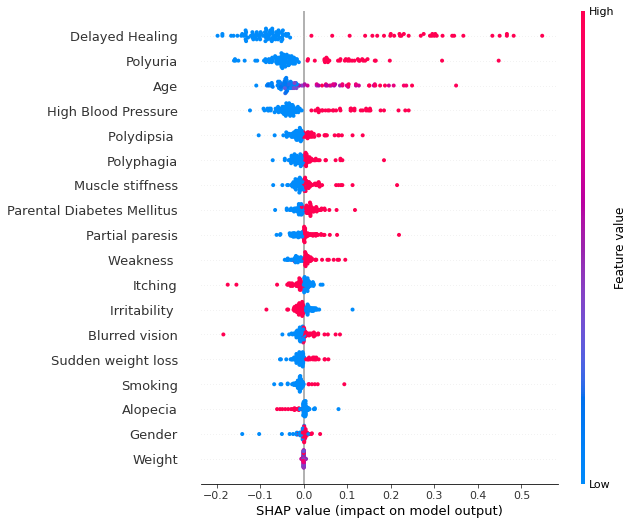

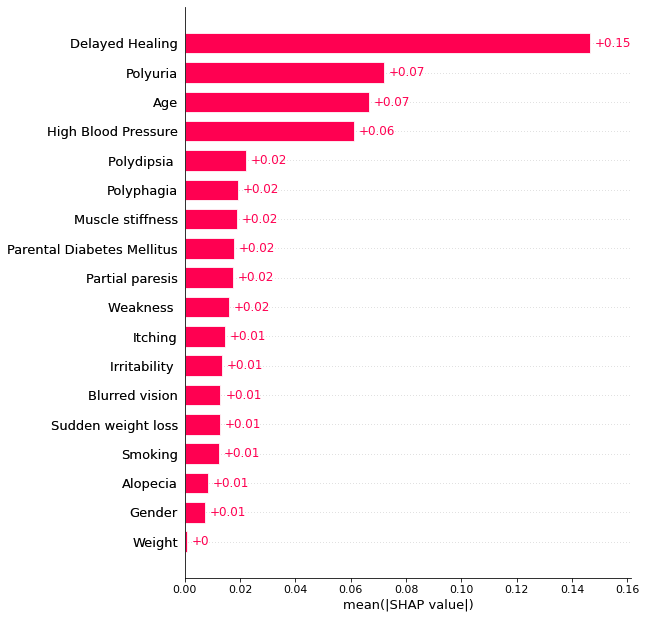

In [ ]:
values = show_shap(svc)
shap_data = shap_value_data(values, shap_data)

###**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

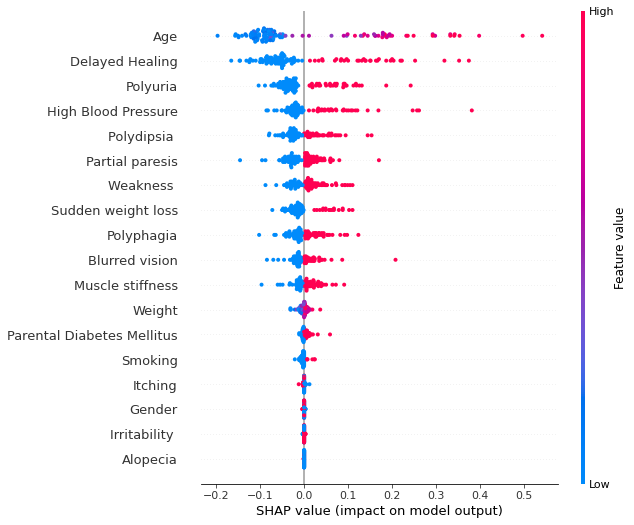

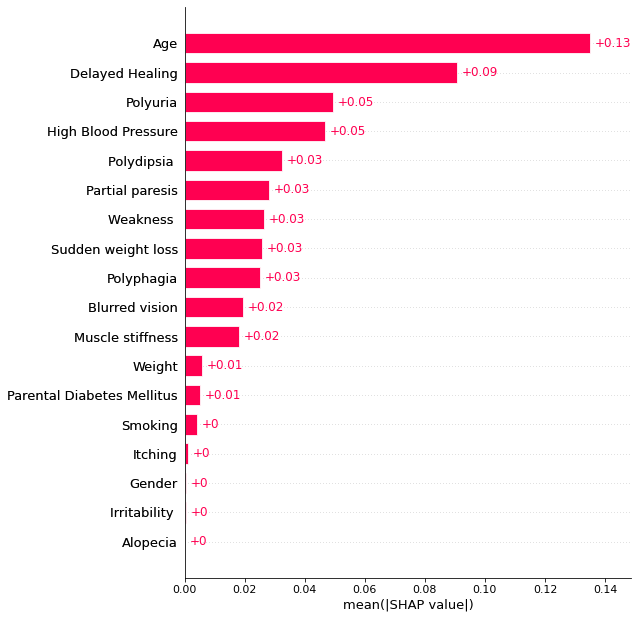

In [ ]:
values = show_shap(nb)
shap_data = shap_value_data(values, shap_data)

###**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

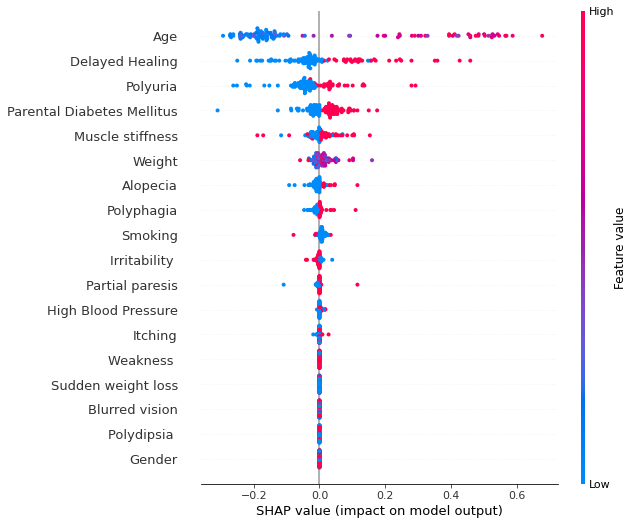

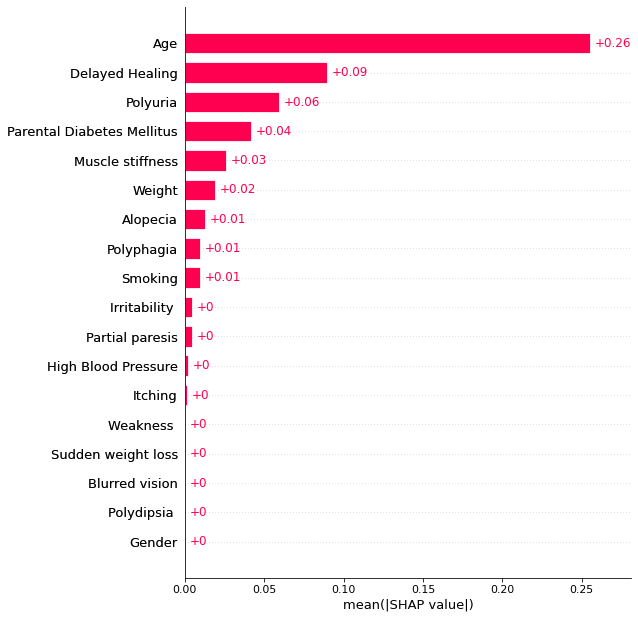

In [ ]:
values = show_shap(tree)
shap_data = shap_value_data(values, shap_data)

###**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Permutation explainer: 113it [00:27,  4.17it/s]


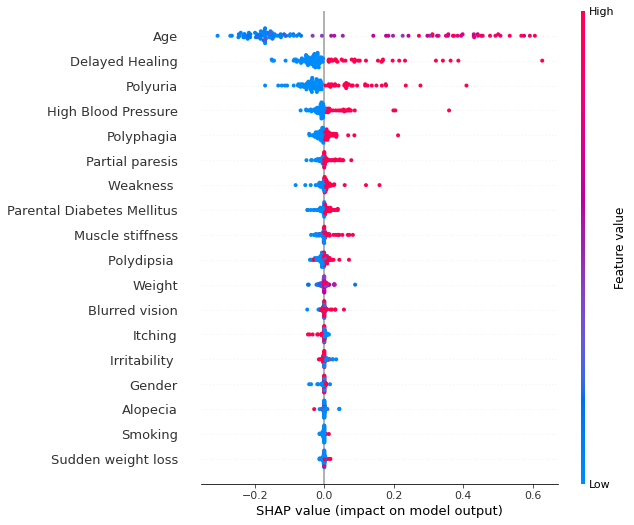

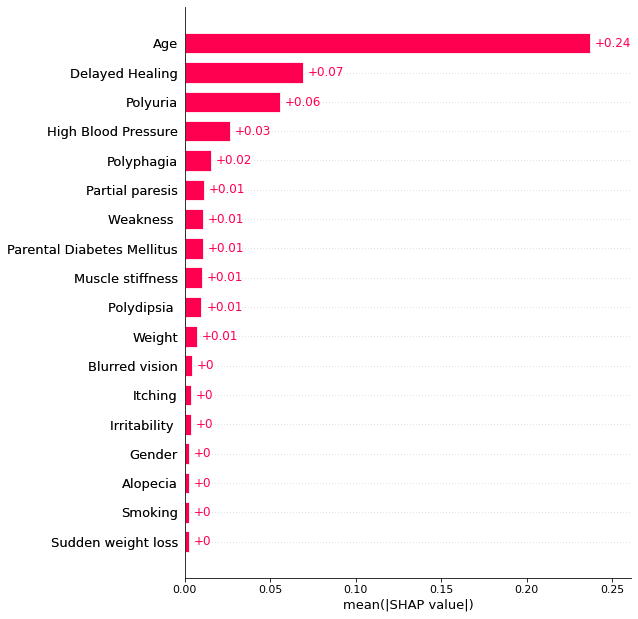

In [ ]:
values = show_shap(rf)
shap_data = shap_value_data(values, shap_data)

###**Stochastic Gradient Descent**

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

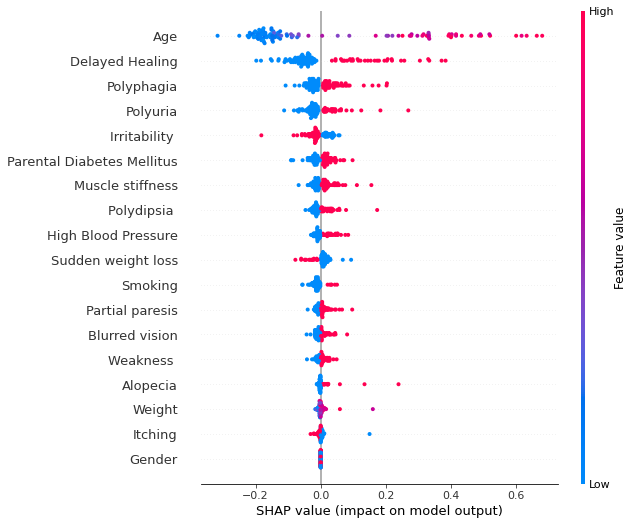

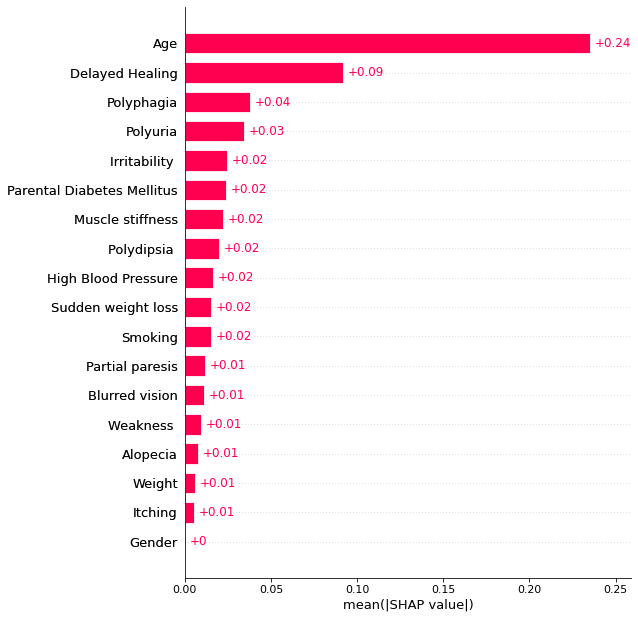

In [ ]:
values = show_shap(sgd)
shap_data = shap_value_data(values, shap_data)

###**Perceptron**

In [ ]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

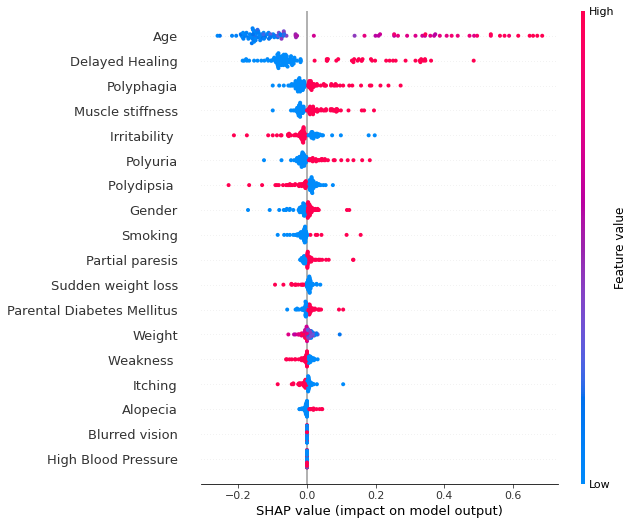

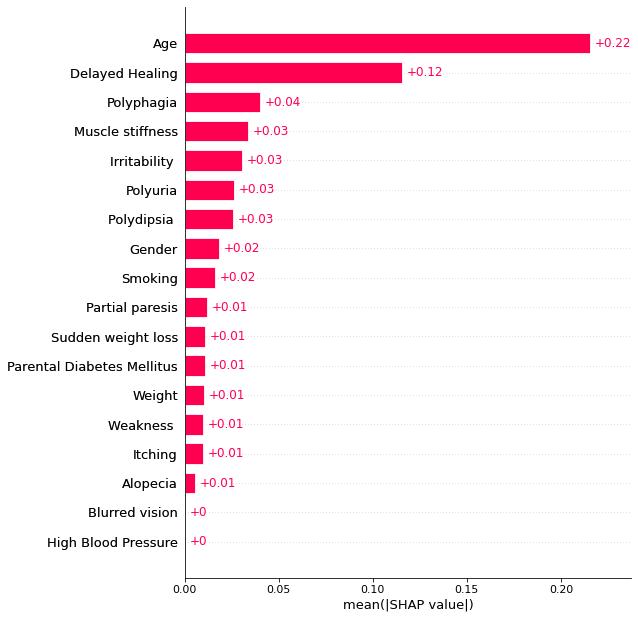

In [ ]:
values = show_shap(perceptron)
shap_data = shap_value_data(values, shap_data)

###**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Permutation explainer: 113it [00:26,  4.24it/s]


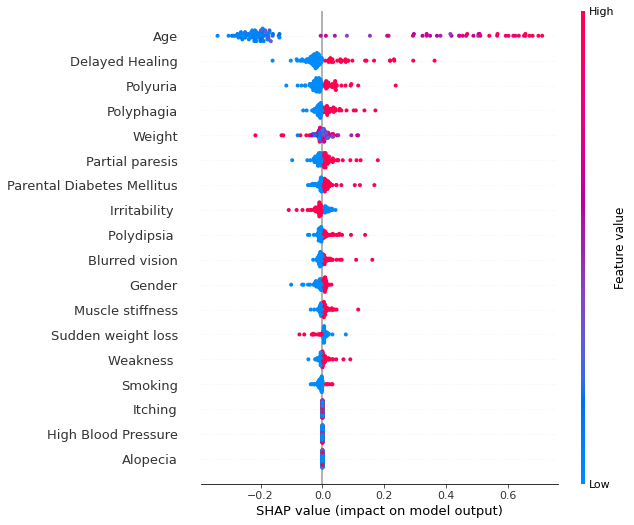

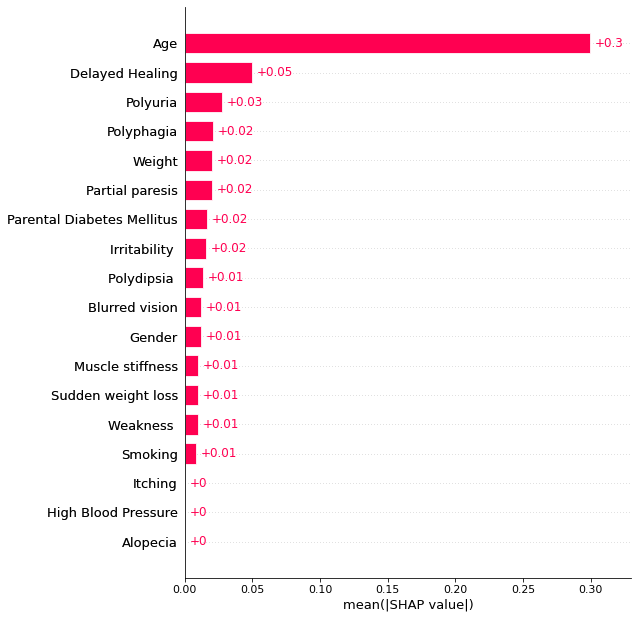

In [ ]:
values = show_shap(adaboost)
shap_data = shap_value_data(values, shap_data)

###**XGBoost**

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

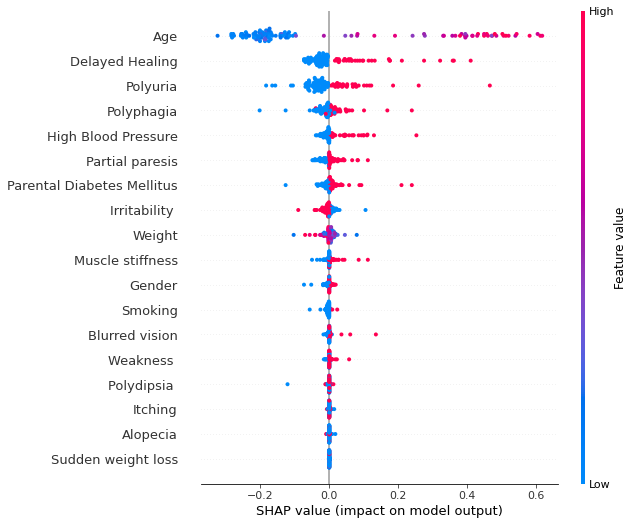

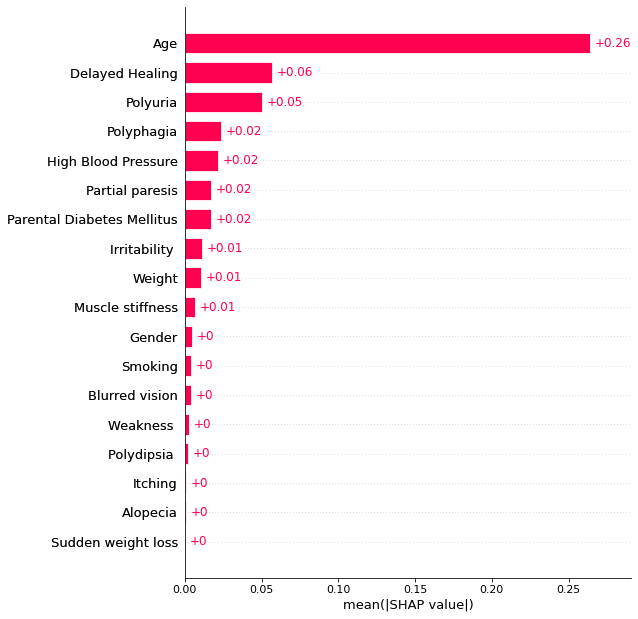

In [ ]:
values = show_shap(xg)
shap_data = shap_value_data(values, shap_data)

###**PassiveAggressiveClassifier**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()
pac.fit(x_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

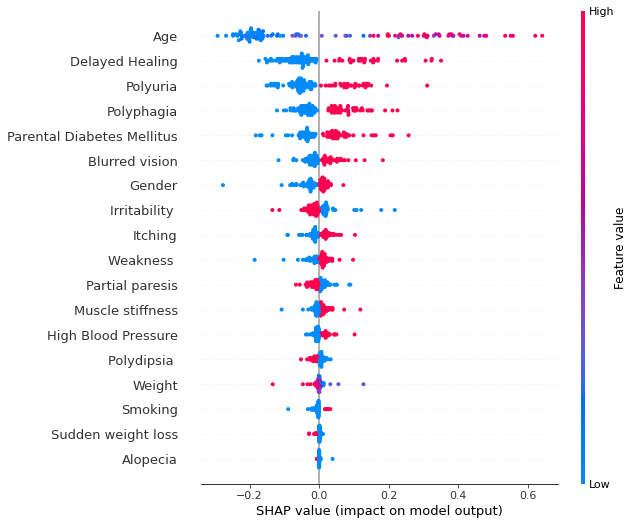

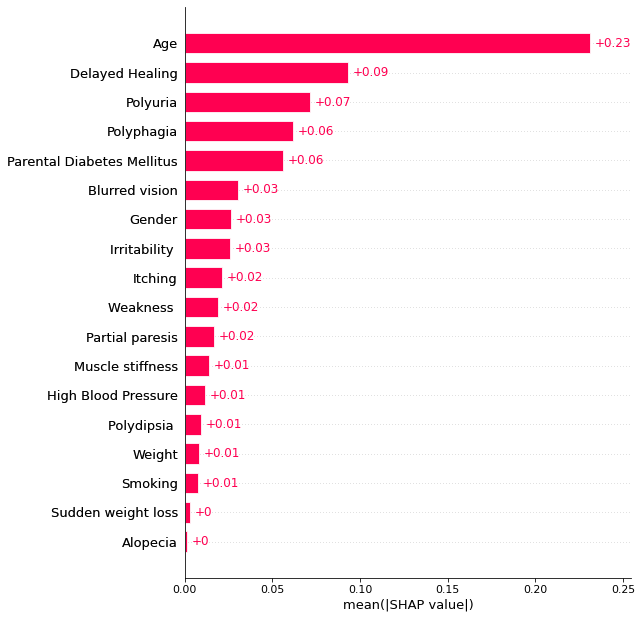

In [ ]:
values = show_shap(pac)
shap_data = shap_value_data(values, shap_data)

###**RidgeClassifier**

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(x_train, y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

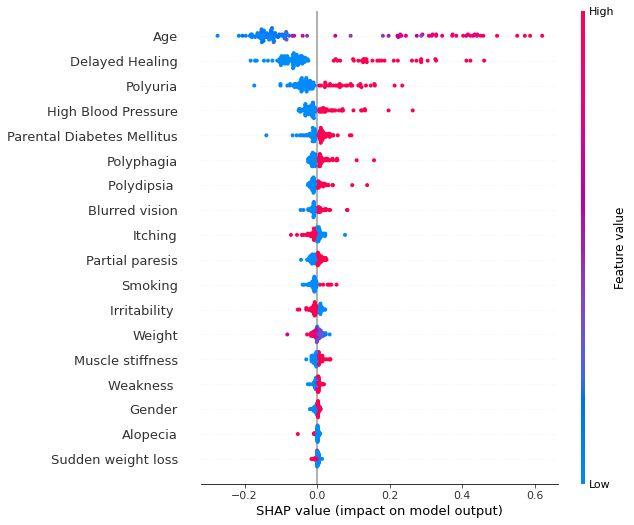

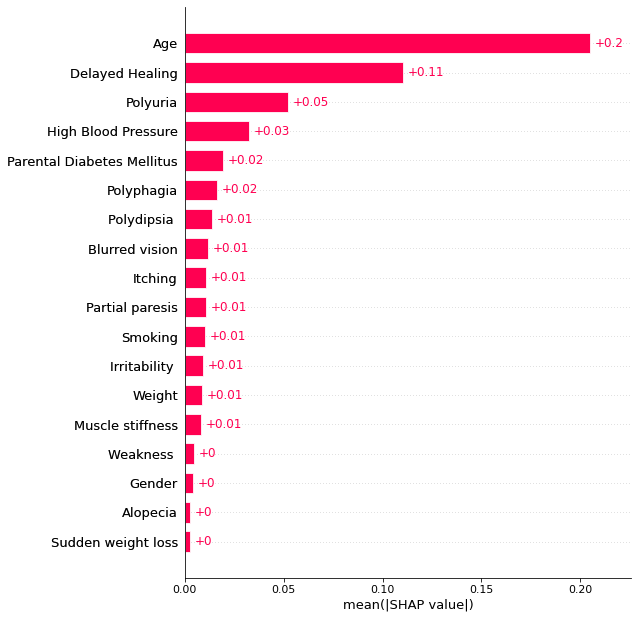

In [ ]:
values = show_shap(ridge)
shap_data = shap_value_data(values, shap_data)

###**Nu-Support Vector Classifier**

In [ ]:
from sklearn.svm import NuSVC
nu_svc = NuSVC()
nu_svc.fit(x_train, y_train)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

Permutation explainer: 113it [00:24,  4.57it/s]


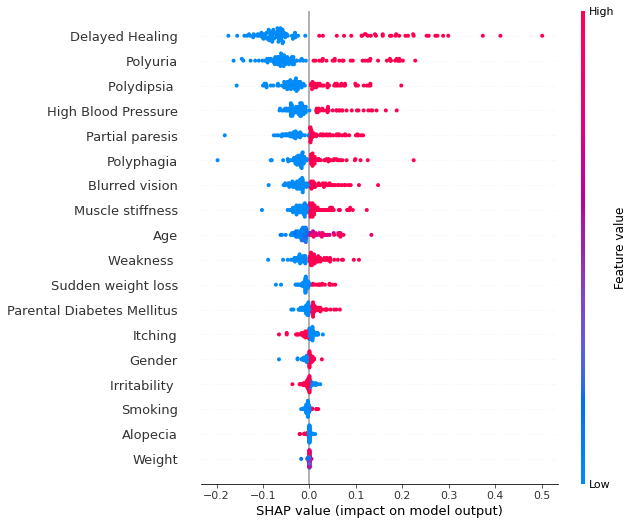

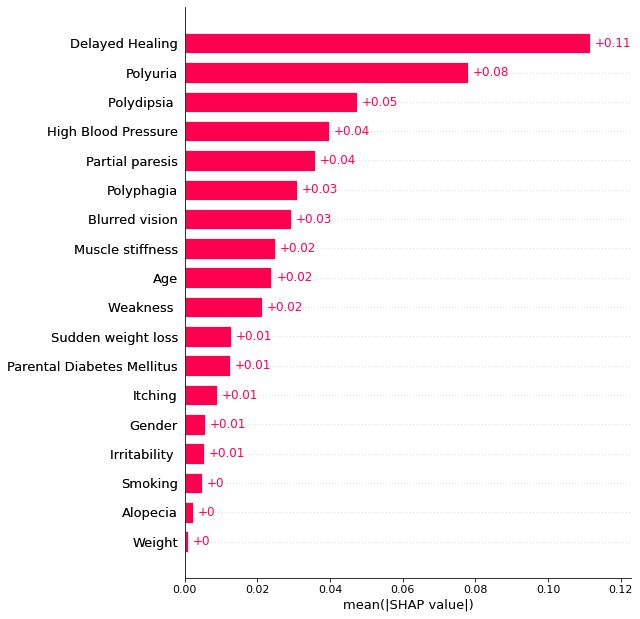

In [ ]:
values = show_shap(nu_svc)
shap_data = shap_value_data(values, shap_data)

###**Linear Support Vector Classifier**

In [ ]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC()
lin_svc.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

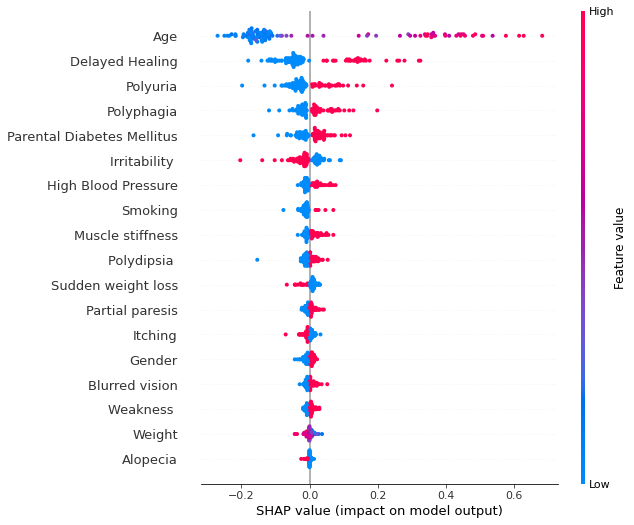

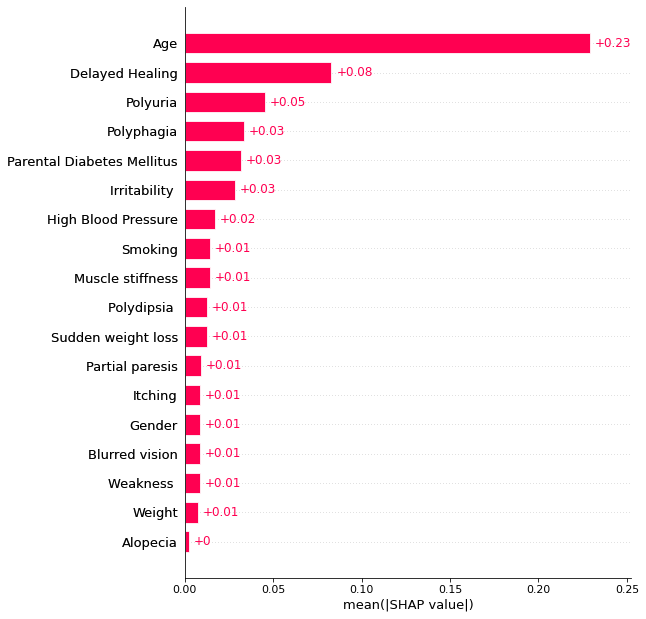

In [ ]:
values = show_shap(lin_svc)
shap_data = shap_value_data(values, shap_data)

###**CalibratedClassifierCV**

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
calCV = CalibratedClassifierCV()
calCV.fit(x_train, y_train)

CalibratedClassifierCV(base_estimator=None, cv=None, method='sigmoid')

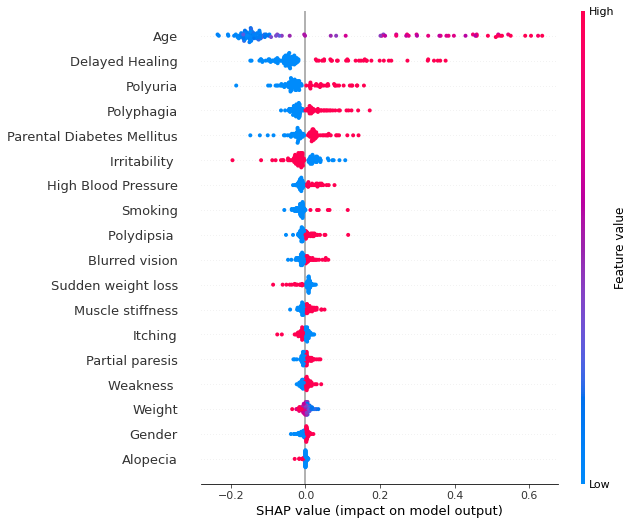

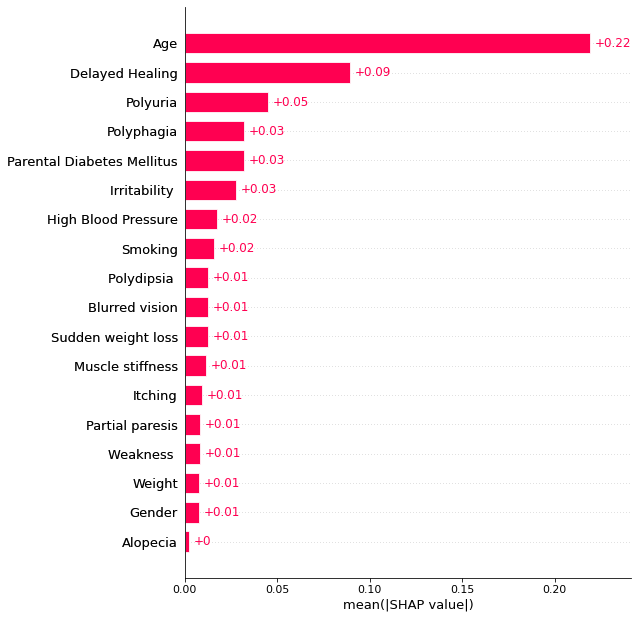

In [ ]:
values = show_shap(calCV)
shap_data = shap_value_data(values, shap_data)

###**Nearest Centroid**

In [ ]:
from sklearn.neighbors import NearestCentroid
nc = NearestCentroid()
nc.fit(x_train, y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

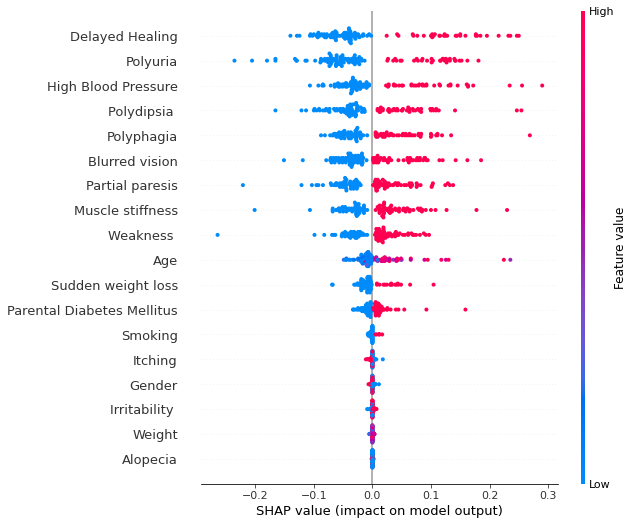

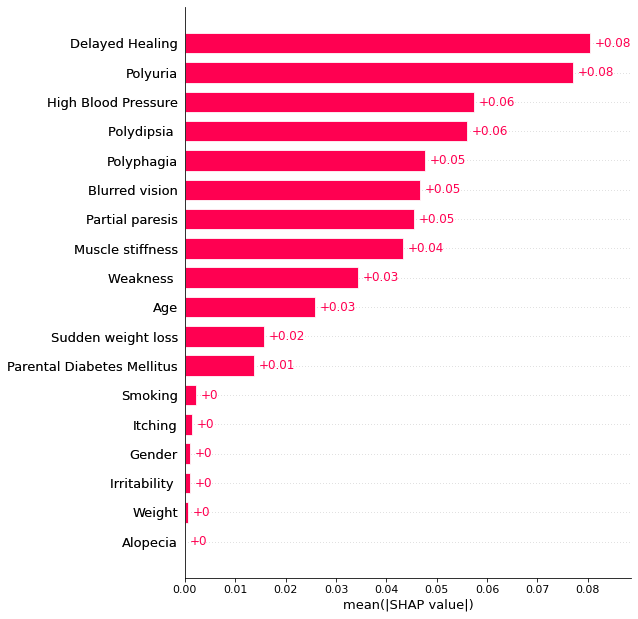

In [ ]:
values = show_shap(nc)
shap_data = shap_value_data(values, shap_data)

###**Gaussian Process Classifier**

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc = GaussianProcessClassifier()
gpc.fit(x_train,y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=100,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=False)

Permutation explainer: 113it [00:52,  2.14it/s]


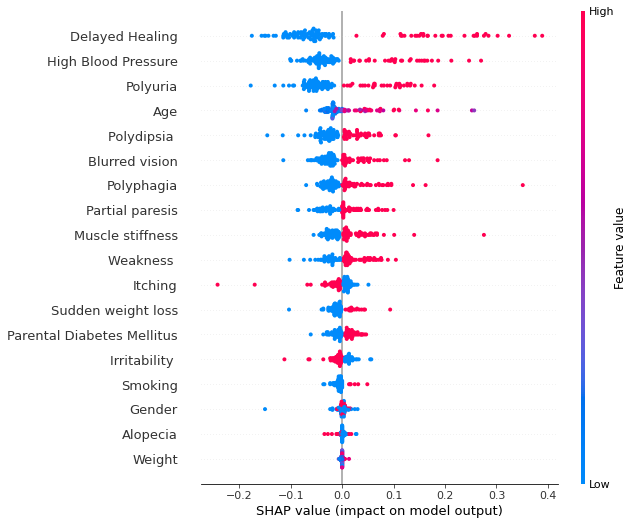

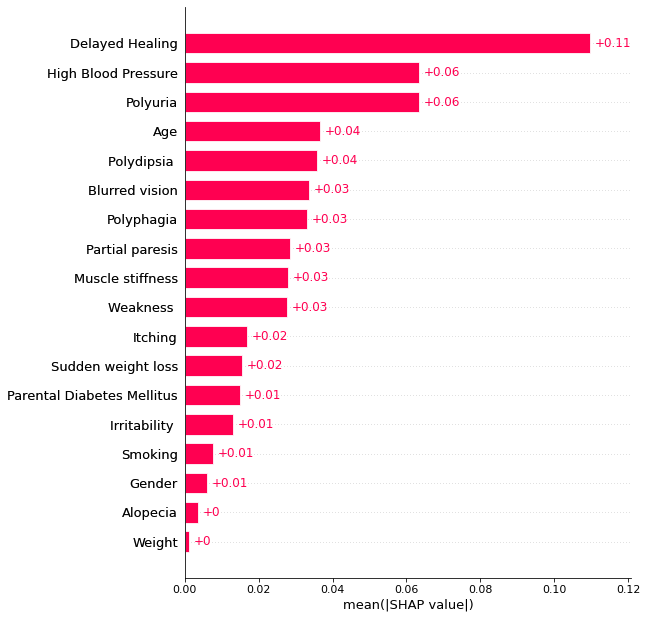

In [ ]:
values = show_shap(gpc)
shap_data = shap_value_data(values, shap_data)

###**MultinomialNB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

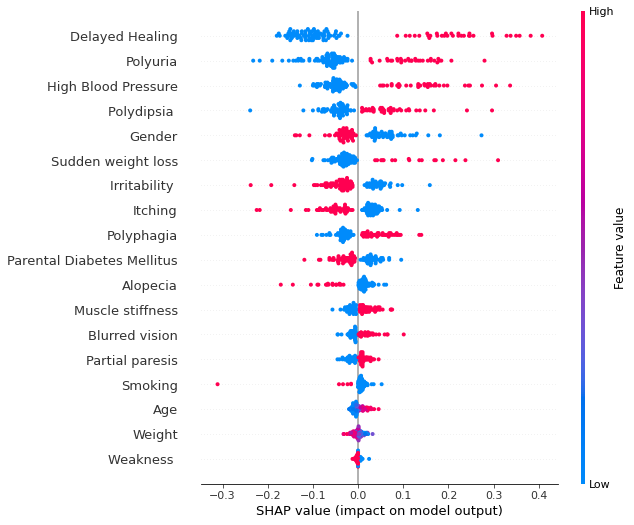

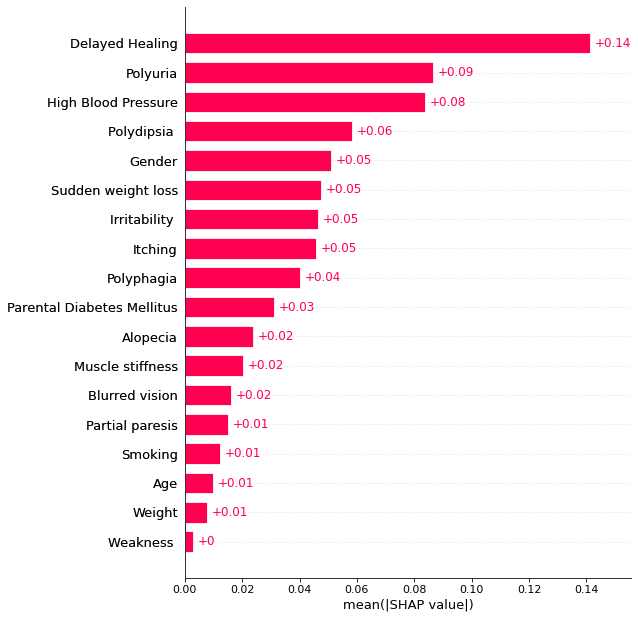

In [ ]:
values = show_shap(mnb)
shap_data = shap_value_data(values, shap_data)

###**ComplementNB**

In [ ]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(x_train, y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

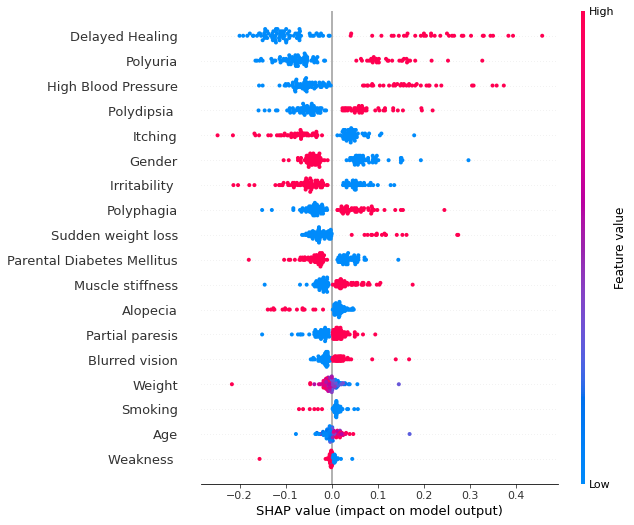

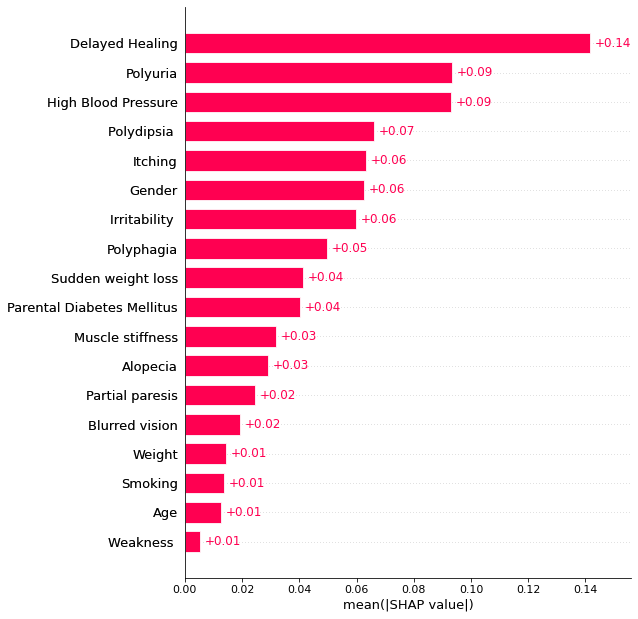

In [ ]:
values = show_shap(cnb)
shap_data = shap_value_data(values, shap_data)

###**BernoulliNB**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

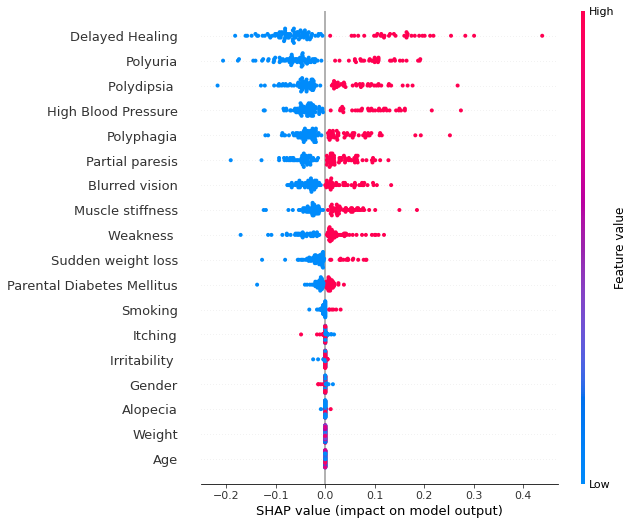

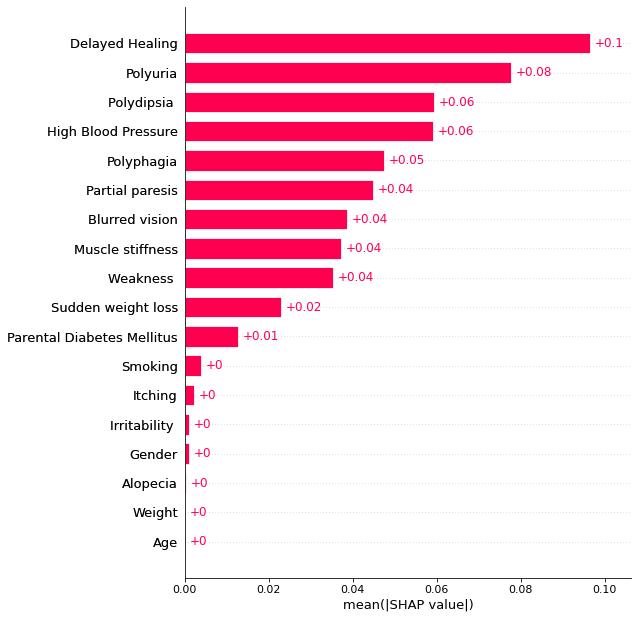

In [ ]:
values =  show_shap(bnb)
shap_data = shap_value_data(values, shap_data)

###**CategoricalNB**

In [ ]:
from sklearn.naive_bayes import CategoricalNB
ca_nb = CategoricalNB()
ca_nb.fit(x_train, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

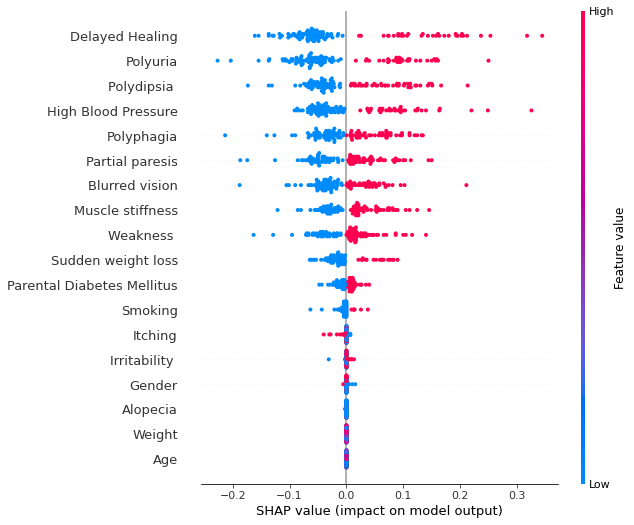

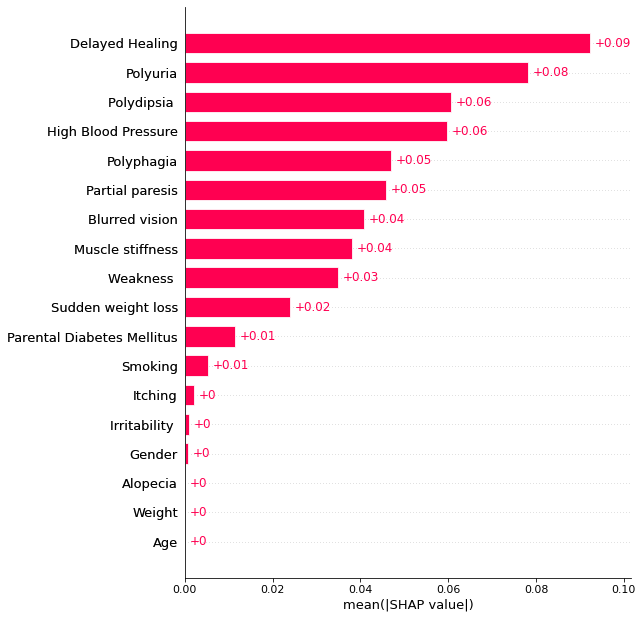

In [ ]:
values = show_shap(ca_nb)
shap_data = shap_value_data(values, shap_data)

###**BaggingClassifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_c = BaggingClassifier()
bag_c.fit(x_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

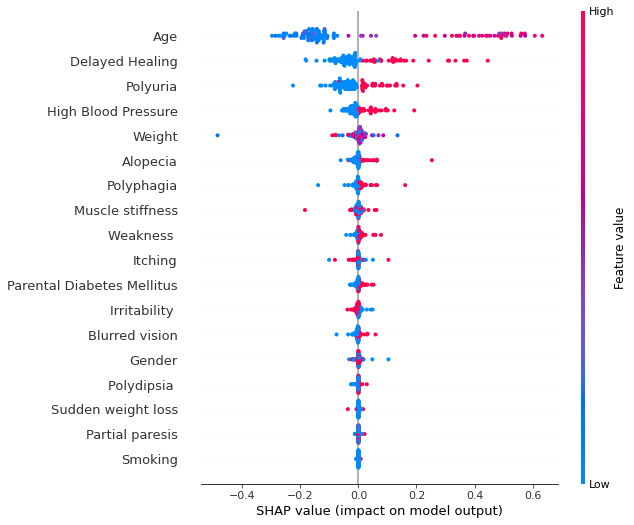

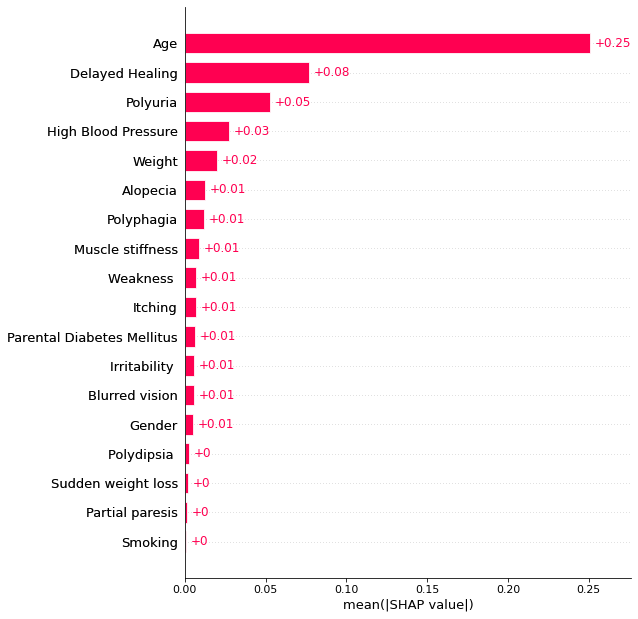

In [ ]:
values = show_shap(bag_c)
shap_data = shap_value_data(values, shap_data)

###**ExtraTreesClassifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ex_tree = ExtraTreesClassifier()
ex_tree.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

Permutation explainer: 113it [00:28,  3.90it/s]


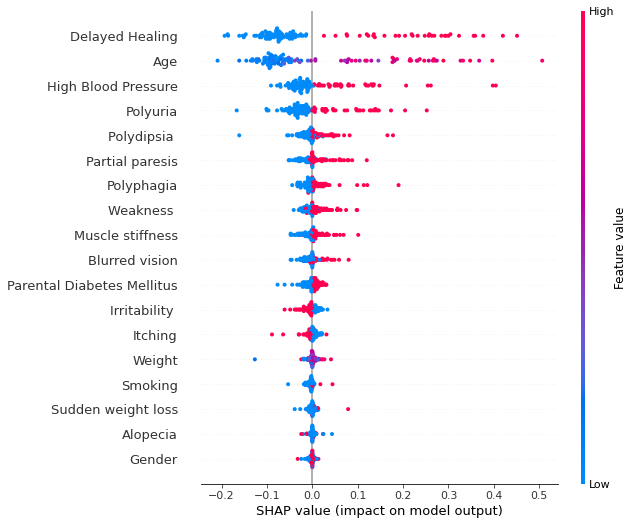

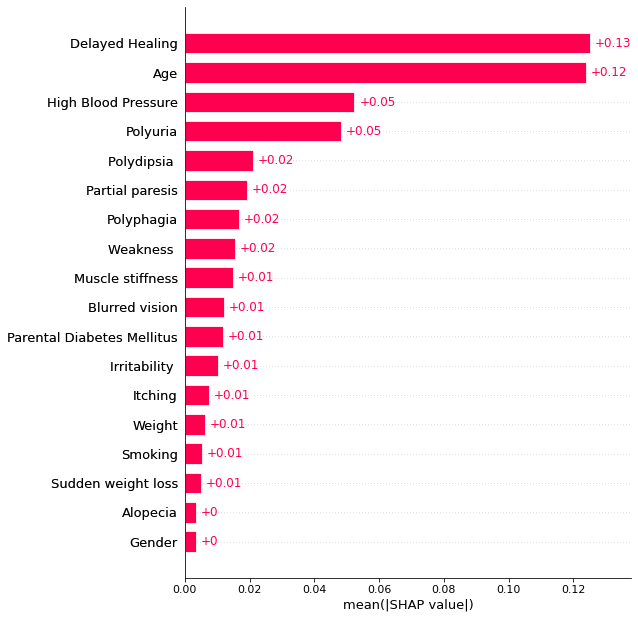

In [ ]:
values = show_shap(ex_tree)
shap_data = shap_value_data(values, shap_data)

###**GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

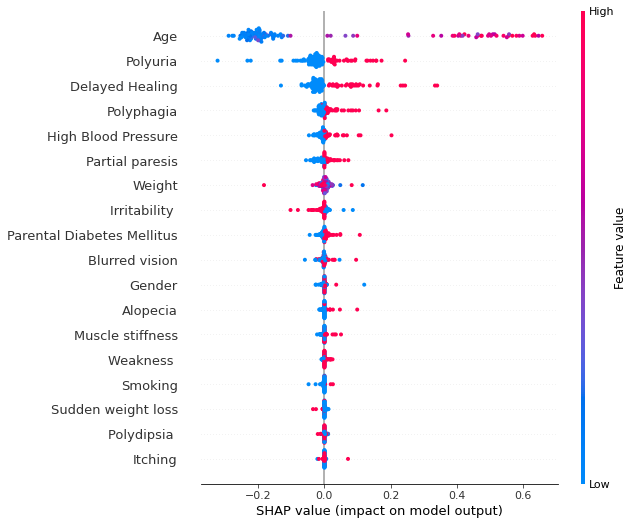

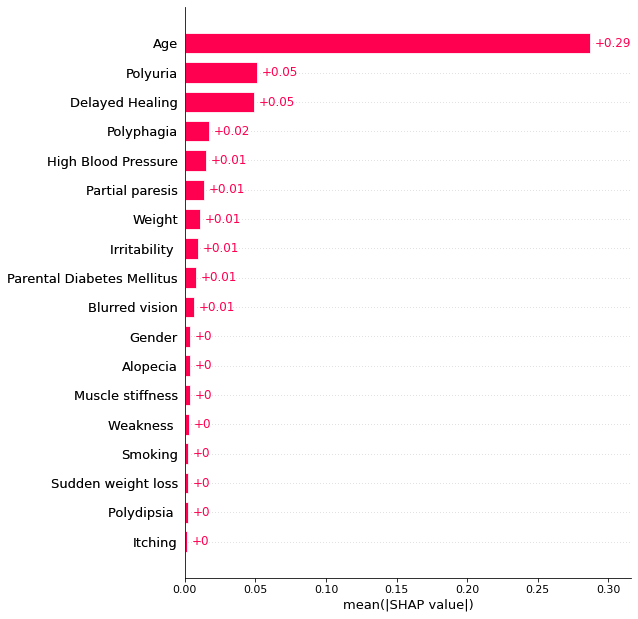

In [ ]:
values = show_shap(gbc)
shap_data = shap_value_data(values, shap_data)

###**HistGradiantBoostingClassifier**

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier()
hgbc.fit(x_train, y_train)

HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.1,
                               loss='auto', max_bins=255, max_depth=None,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=None, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)

Permutation explainer: 113it [00:12,  9.21it/s]


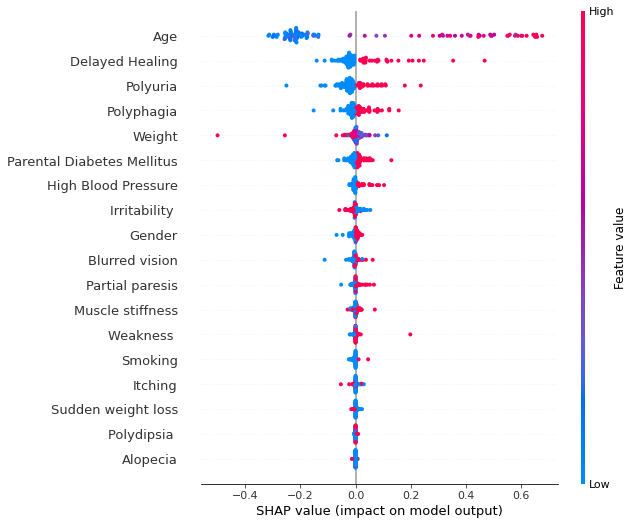

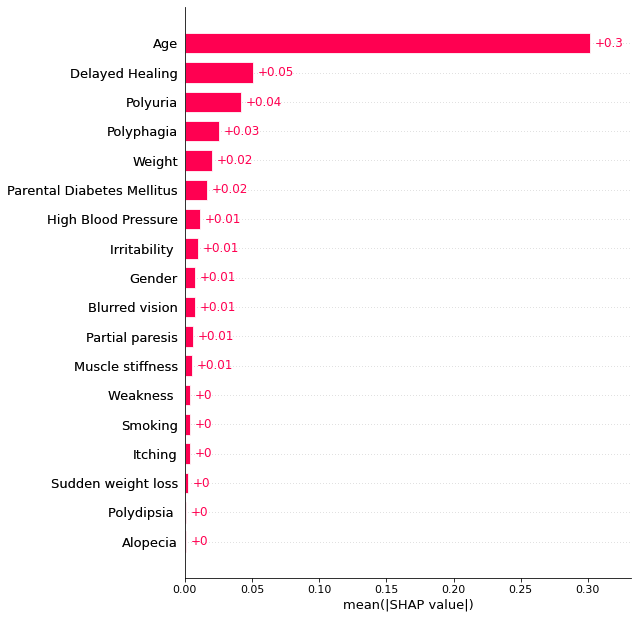

In [ ]:
values = show_shap(hgbc)
shap_data = shap_value_data(values, shap_data)

###**OneVsRest Classifier**

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
one = OneVsRestClassifier(SVC())
one.fit(x_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

Permutation explainer: 113it [00:16,  6.91it/s]


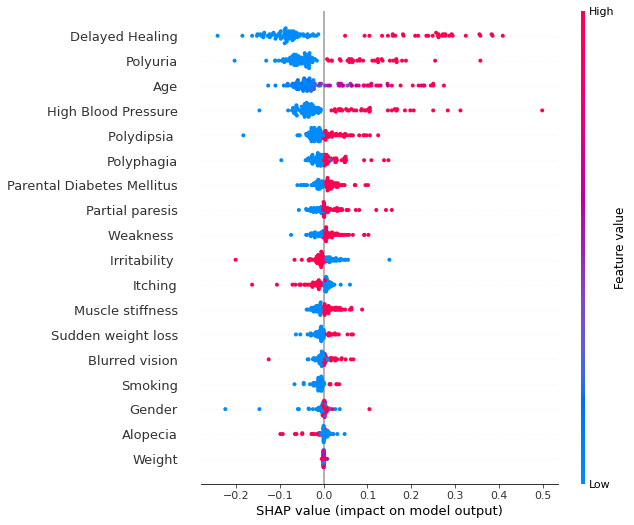

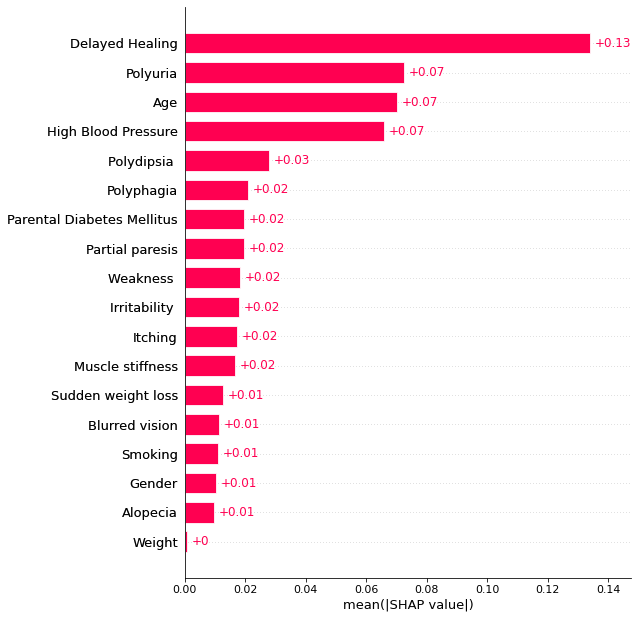

In [ ]:
values =show_shap(one)
shap_data = shap_value_data(values, shap_data)

###**MLPClassifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

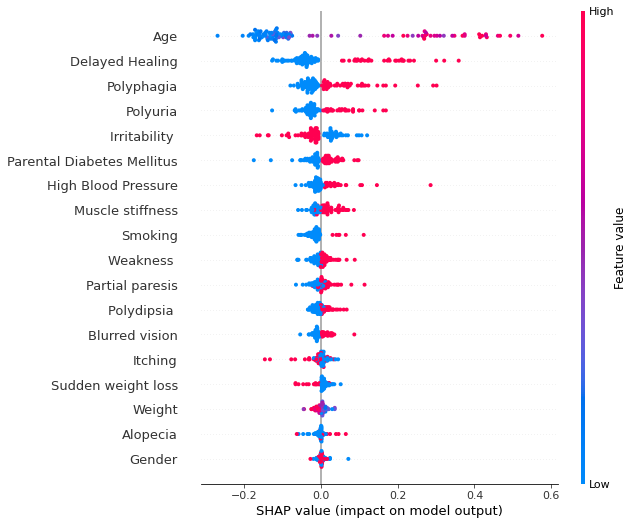

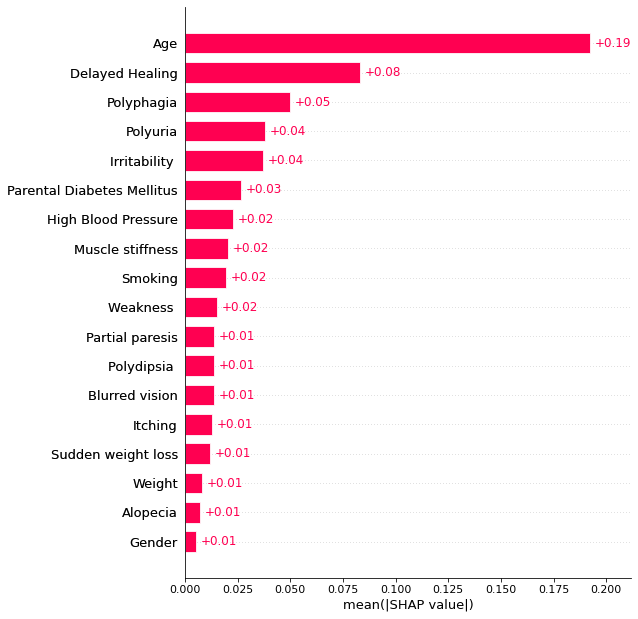

<Figure size 432x288 with 0 Axes>

In [ ]:
values = show_shap(mlp)
shap_data = shap_value_data(values, shap_data)
plt.savefig("shap.jpg")

###**LabelPropagation**

In [ ]:
from sklearn.semi_supervised import LabelPropagation
label = LabelPropagation()
label.fit(x_train, y_train)

LabelPropagation(gamma=20, kernel='rbf', max_iter=1000, n_jobs=None,
                 n_neighbors=7, tol=0.001)

Permutation explainer: 113it [00:41,  2.72it/s]


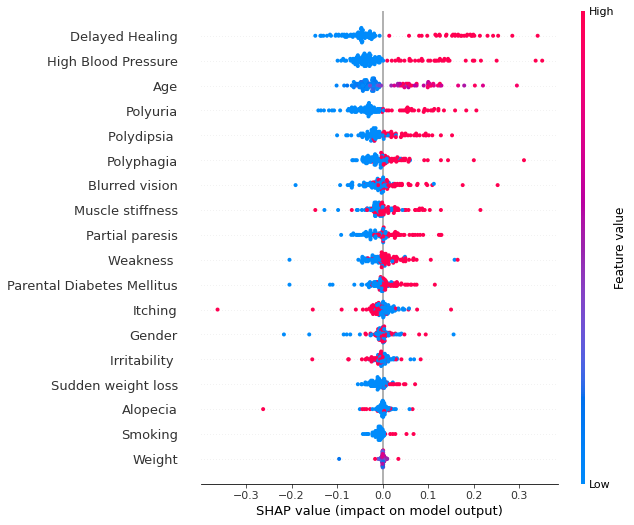

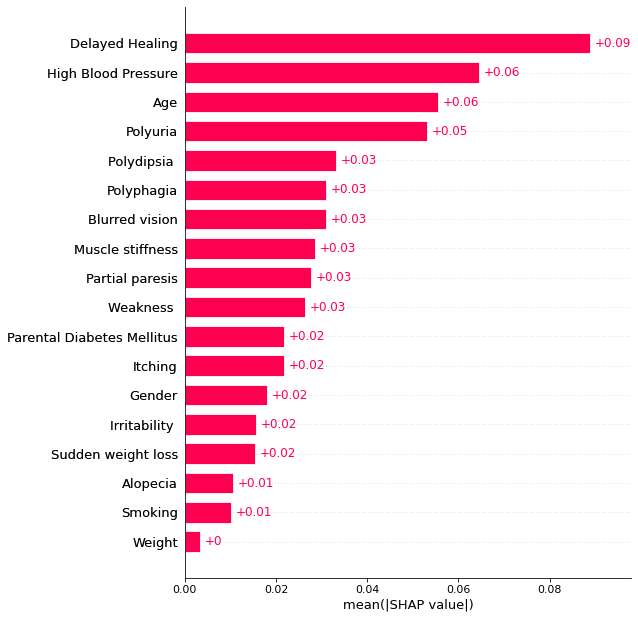

In [ ]:
values = show_shap(label)
shap_data = shap_value_data(values, shap_data)

###**LabelSpreading**

In [ ]:
from sklearn.semi_supervised import LabelSpreading
label_s = LabelSpreading()
label_s.fit(x_train, y_train)

LabelSpreading(alpha=0.2, gamma=20, kernel='rbf', max_iter=30, n_jobs=None,
               n_neighbors=7, tol=0.001)

Permutation explainer: 113it [00:41,  2.75it/s]


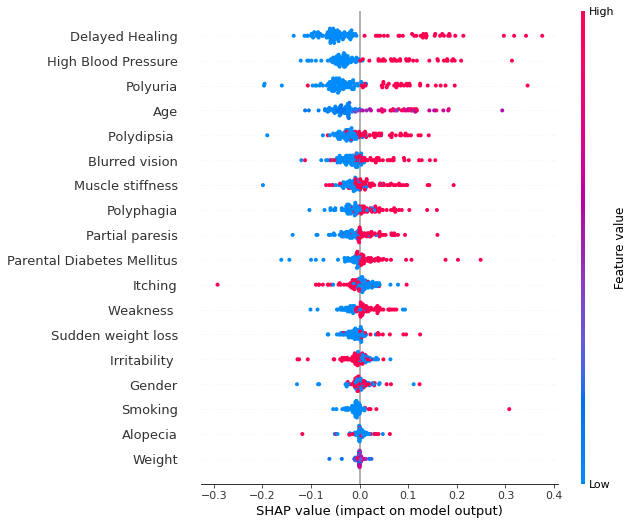

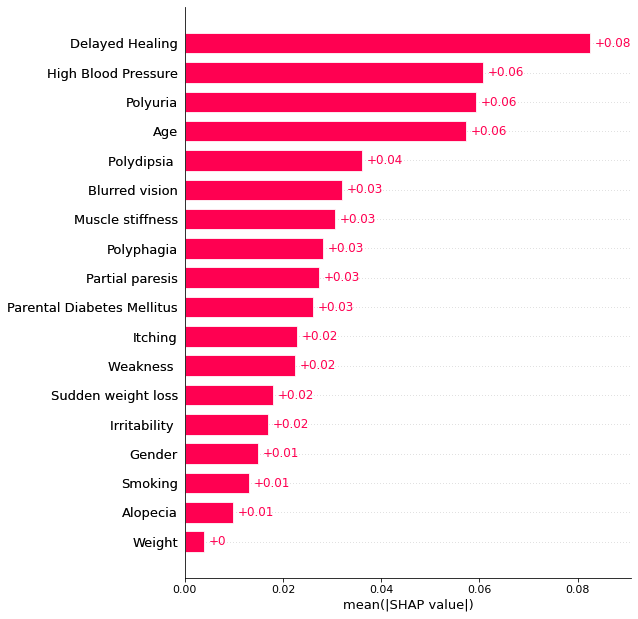

In [ ]:
values = show_shap(label_s)
shap_data = shap_value_data(values, shap_data)

###**StackingClassifier**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sclf.fit(x_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                     

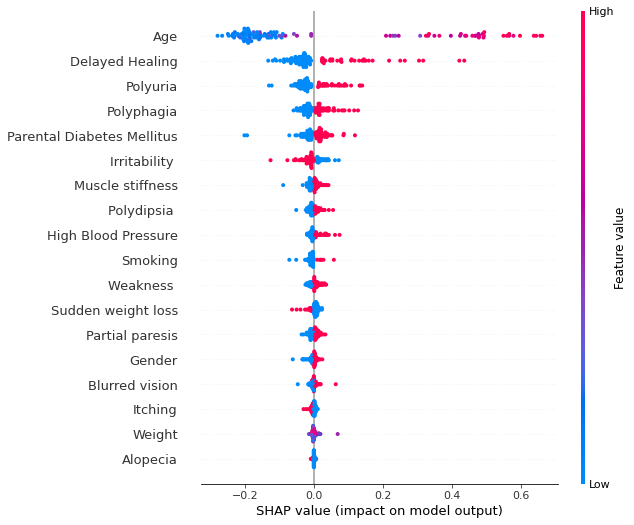

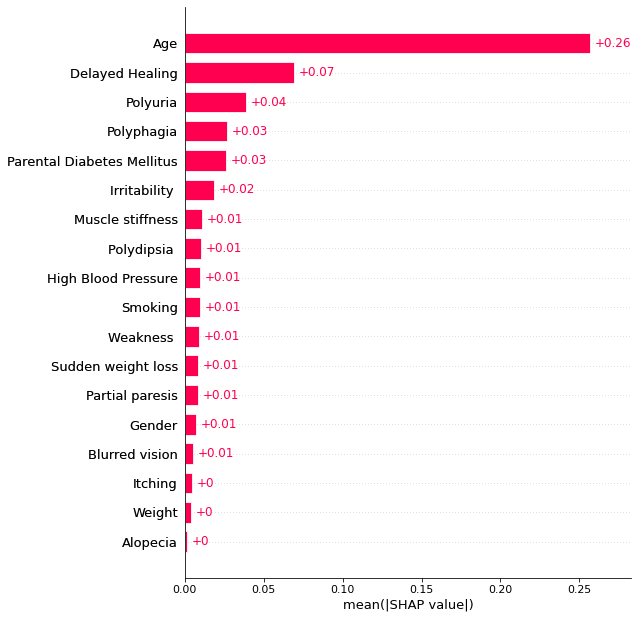

In [ ]:
values = show_shap(sclf)
shap_data = shap_value_data(values, shap_data)

###**RidgeClassifierCV**

In [ ]:
from sklearn.linear_model import RidgeClassifierCV
ridge_cv = RidgeClassifierCV()
ridge_cv.fit(x_train, y_train)

RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]), class_weight=None, cv=None,
                  fit_intercept=True, normalize=False, scoring=None,
                  store_cv_values=False)

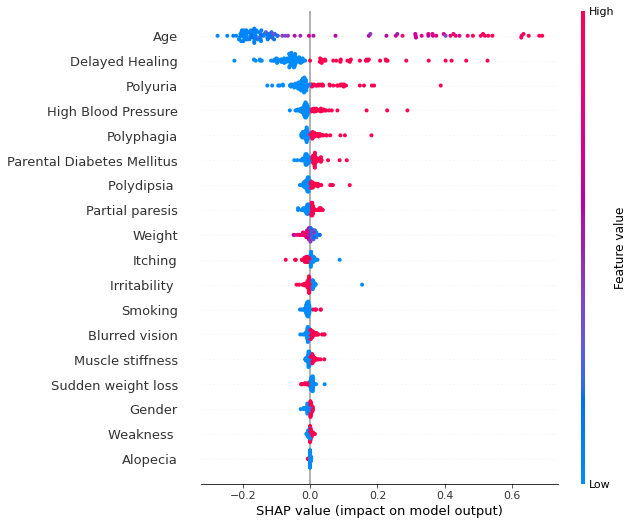

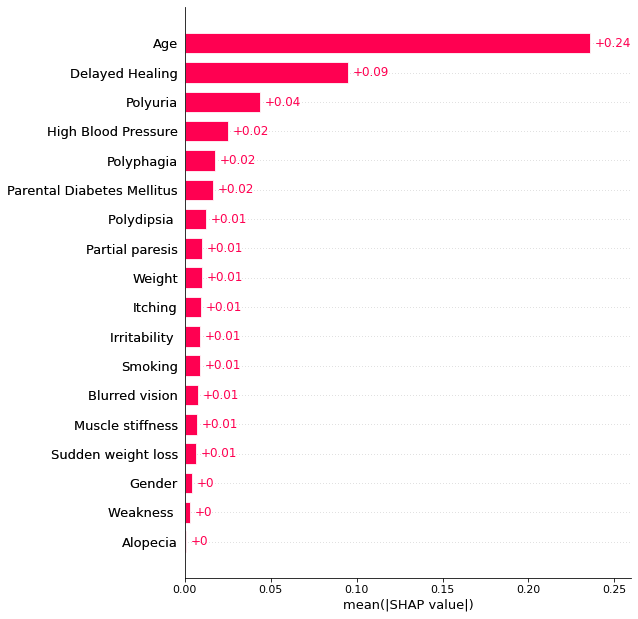

In [ ]:
values = show_shap(ridge_cv)
shap_data = shap_value_data(values, shap_data)

###**LogisticRegressionCV**

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
log_cv = LogisticRegressionCV()
log_cv.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

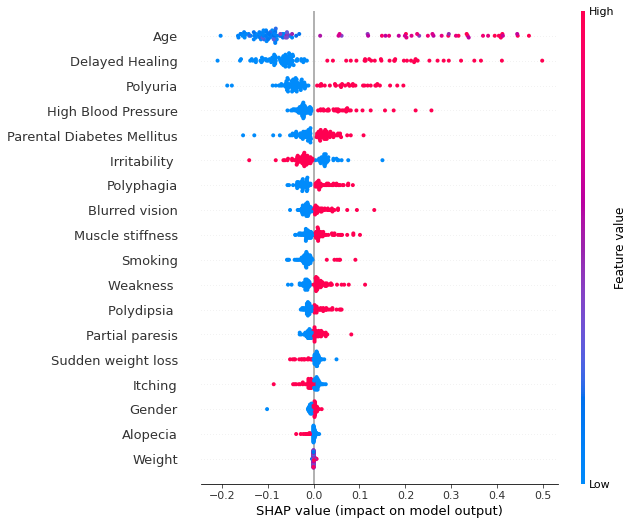

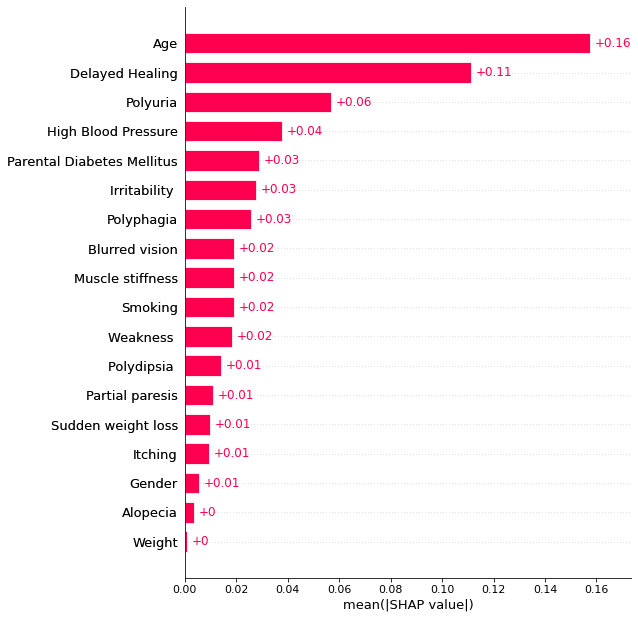

In [ ]:
values = show_shap(log_cv)
shap_data = shap_value_data(values, shap_data)

###**LinearDiscriminantAnalysis**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
linda = LinearDiscriminantAnalysis()
linda.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

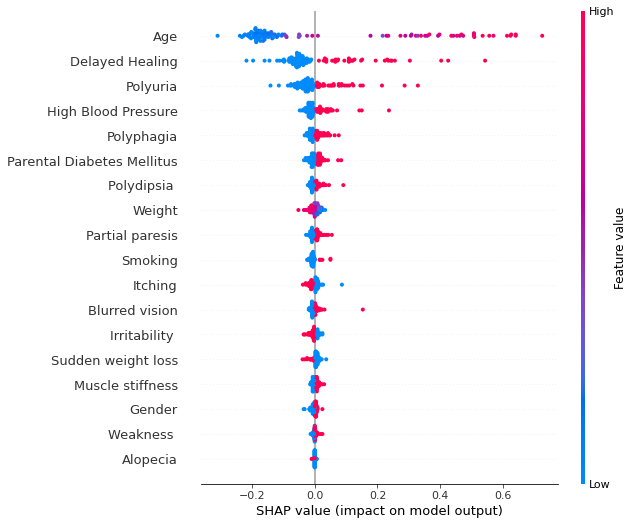

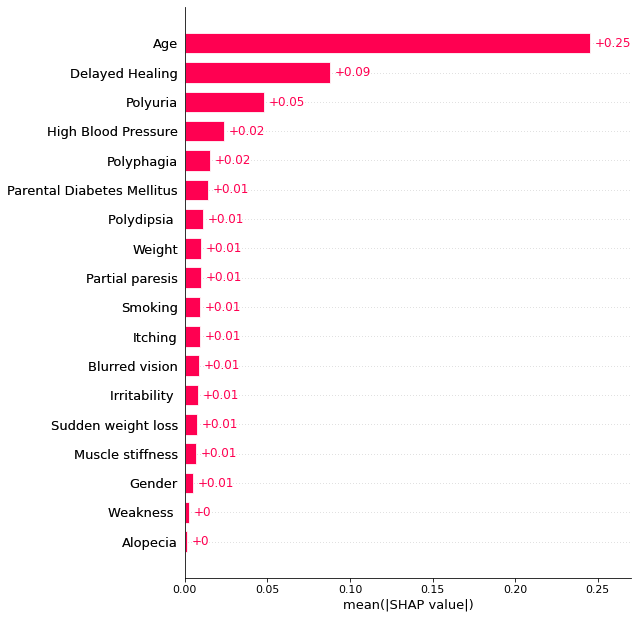

In [ ]:
values = show_shap(linda)
shap_data = shap_value_data(values, shap_data)

###**QuadraticDiscriminantAnalysis**

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
quada = QuadraticDiscriminantAnalysis()
quada.fit(x_train,y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

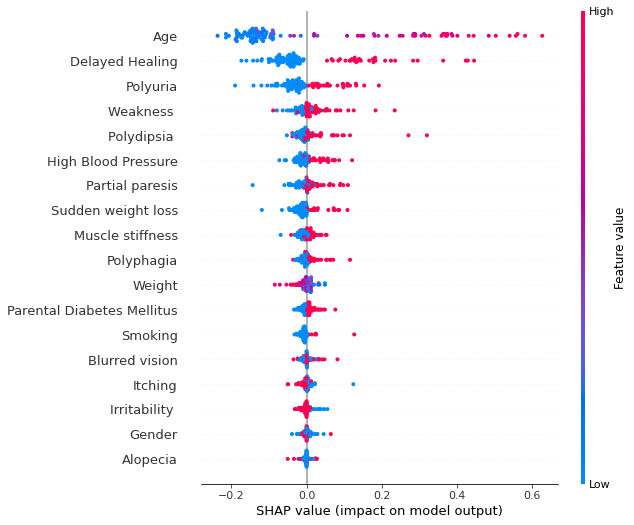

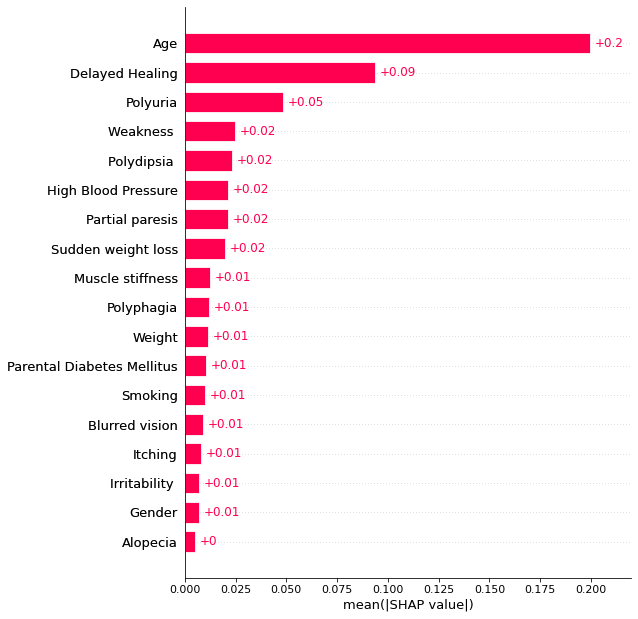

In [ ]:
values = show_shap(quada)
shap_data = shap_value_data(values, shap_data)

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Permutation explainer: 113it [00:13,  8.21it/s]


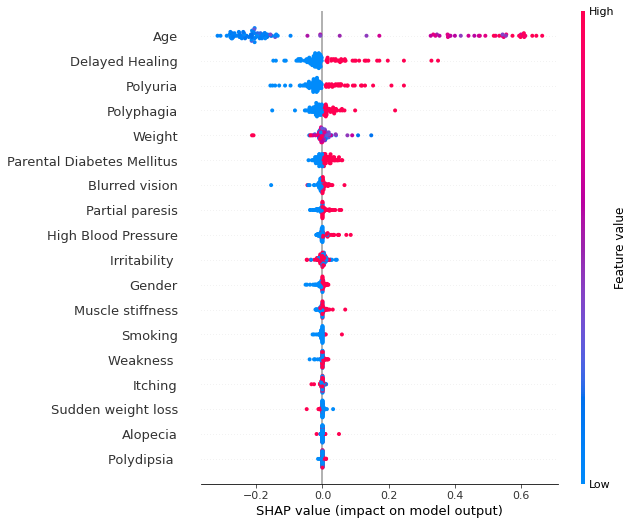

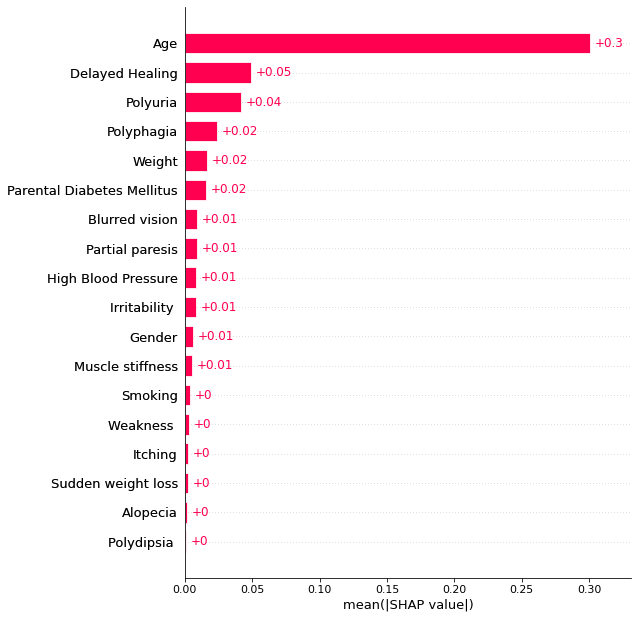

In [ ]:
values = show_shap(lgbm)
shap_data = shap_value_data(values, shap_data)

In [ ]:
shap_data

Age Gender Weight  ... Partial paresis Muscle stiffness Alopecia
0   0.113  0.005  0.000  ...           0.012            0.025    0.005
1   0.057  0.012  0.003  ...           0.033            0.025    0.005
2   0.067  0.007  0.001  ...           0.017            0.019    0.008
3   0.135  0.000  0.006  ...           0.028            0.018    0.000
4   0.255  0.000  0.019  ...           0.004            0.026    0.013
5   0.237  0.003  0.007  ...           0.011            0.010    0.003
6   0.235  0.000  0.006  ...           0.012            0.022    0.008
7   0.215  0.018  0.010  ...           0.012            0.034    0.006
8   0.299  0.012  0.020  ...           0.020            0.010    0.000
9   0.264  0.005  0.011  ...           0.017            0.007    0.001
10  0.231  0.026  0.008  ...           0.017            0.014    0.001
11  0.205  0.004  0.009  ...           0.011            0.008    0.003
12  0.024  0.006  0.001  ...           0.036            0.025    0.002
13  0.229  0.009  0.007  ...           0.009            0.014    0.003
14  0.219  0.008  0.008  ...           0.008            0.011    0.002
15  0.026  0.001  0.001  ...           0.045            0.043    0.000
16  0.037  0.006  0.001  ...           0.028            0.028    0.004
17  0.010  0.051  0.008  ...           0.015            0.020    0.024
18  0.013  0.062  0.014  ...           0.025            0.032    0.029
19  0.000  0.001  0.000  ...           0.045            0.037    0.000
20  0.000  0.001  0.000  ...           0.046            0.038    0.000
21  0.251  0.005  0.020  ...           0.001            0.009    0.013
22  0.124  0.003  0.006  ...           0.019            0.015    0.004
23  0.287  0.004  0.011  ...           0.014            0.004    0.004
24  0.301  0.008  0.020  ...           0.006            0.006    0.001
25  0.070  0.010  0.001  ...           0.020            0.017    0.010
26  0.192  0.005  0.008  ...           0.014            0.021    0.007
27  0.056  0.018  0.003  ...           0.028            0.028    0.011
28  0.057  0.015  0.004  ...           0.027            0.031    0.010
29  0.257  0.007  0.004  ...           0.008            0.011    0.001
30  0.236  0.004  0.010  ...           0.010            0.007    0.001
31  0.157  0.005  0.001  ...           0.011            0.019    0.004
32  0.245  0.005  0.010  ...           0.010            0.007    0.001
33  0.199  0.007  0.011  ...           0.021            0.013    0.005
34  0.301  0.006  0.017  ...           0.009            0.005    0.002

[35 rows x 18 columns]

In [ ]:
shap_data.to_excel('/content/shap_collected.xlsx')